## User Behaviour in Different Time Scales

##### User behaviour in a week

In [1]:
import pandas as pd
import numpy as np

In [2]:
users = pd.read_csv('/Users/paxton615/Github_Personal/Alibaba_UserBehavior_Analysis/drafts/users_2m.csv')
users.drop('Unnamed: 0', axis=1, inplace=True)
users.head()

,user_id,item_id,category_id,status,date,dayofweek,hour
0,309818,4710383,1792277,pv,2017-11-29,2,20
1,309818,1421743,4069500,pv,2017-11-29,2,20
2,309818,800137,1216617,pv,2017-11-29,2,20
3,309818,2493122,1216617,pv,2017-11-29,2,20
4,309818,1461532,3102419,pv,2017-11-30,3,7


In [4]:
# aggregate status from 11.25-12.03
weekly_status=pd.DataFrame(users.groupby(['date','status'], as_index=False).user_id.count())
weekly_status = weekly_status.pivot(index='date',columns='status')
weekly_status

user_id                      
status         buy   cart    fav      pv
date                                    
2017-11-25    5868  17040   9163  258856
2017-11-26    5995  18057   9245  260688
2017-11-27    6566  16564   8817  246517
2017-11-28    6055  16468   8639  242771
2017-11-29    6299  16771   8885  247401
2017-11-30    6458  17192   9177  251903
2017-12-01    6137  18759   9088  264524
2017-12-02    7707  23909  12058  334480
2017-12-03    7452  23228  11481  328748

In [6]:
# tidy columns' names
weekly_status.columns = ['buy', 'cart', 'fav', 'pv']
# put column names in order
weekly_status = weekly_status[['pv','fav','cart','buy']]
weekly_status

,pv,fav,cart,buy
date,,,,
2017-11-25,258856,9163,17040,5868
2017-11-26,260688,9245,18057,5995
2017-11-27,246517,8817,16564,6566
2017-11-28,242771,8639,16468,6055
2017-11-29,247401,8885,16771,6299
2017-11-30,251903,9177,17192,6458
2017-12-01,264524,9088,18759,6137
2017-12-02,334480,12058,23909,7707
2017-12-03,328748,11481,23228,7452


In [7]:
# preparetion for visual
print(list(weekly_status.pv.values))

print(list(weekly_status.fav.values))

print(list(weekly_status.cart.values))

print(list(weekly_status.buy.values))

[258856, 260688, 246517, 242771, 247401, 251903, 264524, 334480, 328748]
[9163, 9245, 8817, 8639, 8885, 9177, 9088, 12058, 11481]
[17040, 18057, 16564, 16468, 16771, 17192, 18759, 23909, 23228]
[5868, 5995, 6566, 6055, 6299, 6458, 6137, 7707, 7452]


In [13]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker
from IPython.display import IFrame
from IPython.display import Image
c = (
    Bar(init_opts=opts.InitOpts(width="1000px", height="500px"))
    .add_xaxis(list(weekly_status.index))
    .add_yaxis("pv", [258856, 260688, 246517, 242771, 247401, 251903, 264524, 334480, 328748]) #tried using list(ub_daily.pv.values), doesn't work
    .add_yaxis("cart", [17040, 18057, 16564, 16468, 16771, 17192, 18759, 23909, 23228])
    .add_yaxis("fav",[9163, 9245, 8817, 8639, 8885, 9177, 9088, 12058, 11481])
    .add_yaxis("buy", [5868, 5995, 6566, 6055, 6299, 6458, 6137, 7707, 7452])
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Weekly_status : pv_cart_fav_buy"),
#         toolbox_opts=opts.ToolboxOpts(),
        legend_opts=opts.LegendOpts(is_show=False),
    )
    .render("bar_toolbox.html")
)
IFrame(src='./bar_toolbox.html', width=1200, height=600)

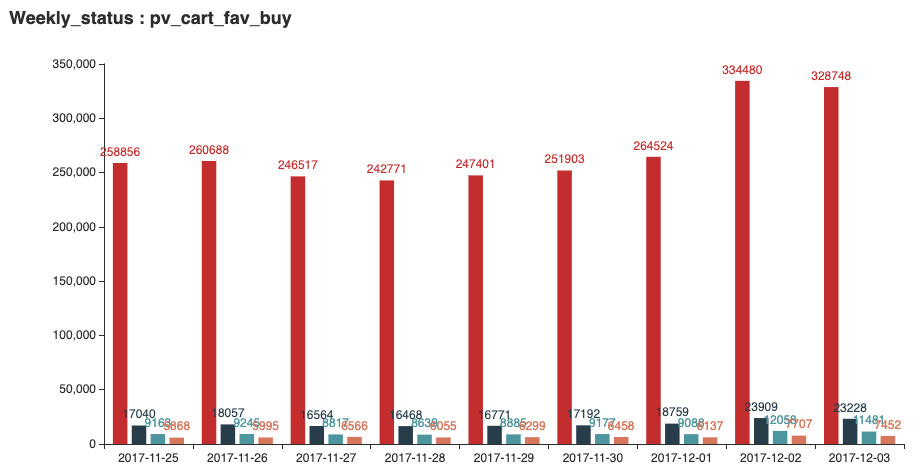

In [14]:
Image(filename='/Users/paxton615/Github_Personal/Alibaba_UserBehavior_Analysis/pics/Weekly_status.png')

#### 12.02 and 12.03 are Saturday and Sunday. Clearly, numbers are elivated in the weekend which can be a good time for promotions.